# Problem statement: 
Create a classification model to predict the sentiment either (Positive or
Negative) based on Covid Tweets

# Context: 
The tweets have been pulled from Twitter and manual tagging has been done then.
The names and usernames have been given codes to avoid any privacy concerns.


# Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk 
from nltk.stem.porter import *
import sklearn.model_selection, sklearn.svm, sklearn.neighbors, sklearn.metrics
import matplotlib.pyplot as plt
palette=sns.color_palette('magma')
sns.set(palette=palette)

# Dataset

In [3]:
df=pd.read_csv("Dataset.csv",encoding='latin-1')

In [4]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [6]:
df.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [7]:
df.shape

(41157, 6)

In [8]:
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

# Remove null value (if any)

In [9]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [10]:
df["Location"]=df["Location"].fillna('U')
df.isnull().sum()

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

# Exploring the data

In [11]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,U,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,U,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [12]:
df['Location'].value_counts()#u is unknown

U                               8592
London                           540
United States                    528
London, England                  520
New York, NY                     395
                                ... 
Staffordshire Moorlands            1
Kithchener ON                      1
Tulsa, Ok                          1
Watford, South Oxhey, Bushey       1
i love you so much || he/him       1
Name: Location, Length: 12220, dtype: int64

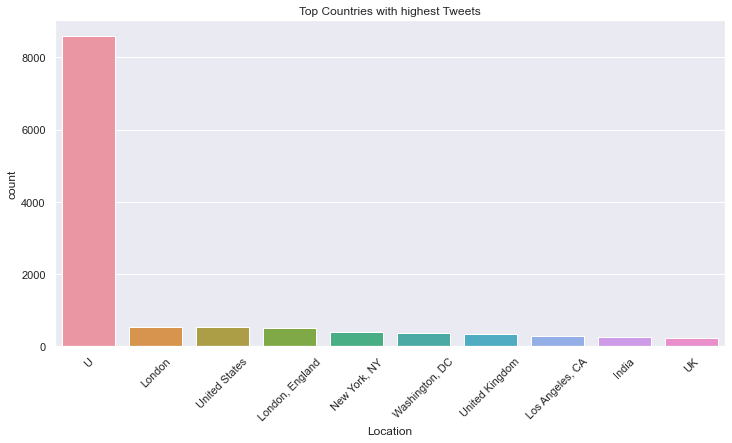

In [13]:
plt.figure(figsize=(12,6))
plt.title('Top Countries with highest Tweets')
countries =sns.countplot(x='Location', data=df, order=df['Location'].value_counts().index[:10])
countries.set_xticklabels(countries.get_xticklabels(), rotation=45)
plt.show() 

In [14]:
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

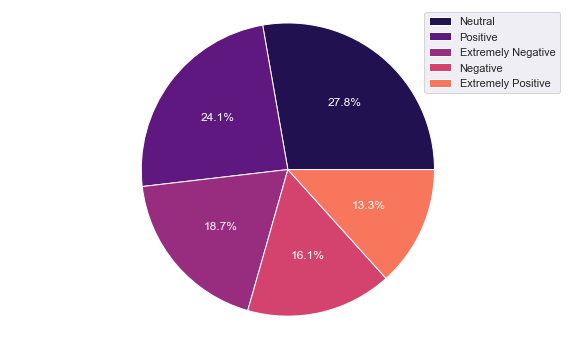

In [15]:
plt.figure(figsize=(10,6))
plt.pie(df['Sentiment'].value_counts(), labels=df['Sentiment'].unique(), autopct='%.1f%%', textprops={'color':"w"})
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

In [16]:
df.TweetAt.value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

So most of the tweets are from march 2020 to april 2020.

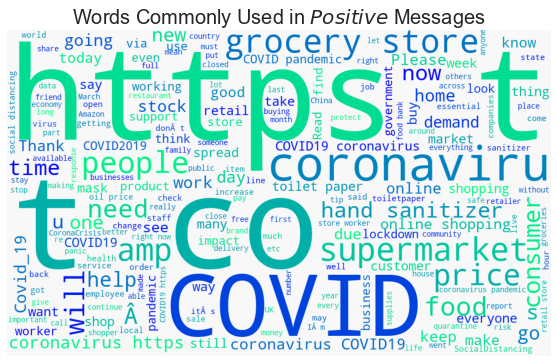

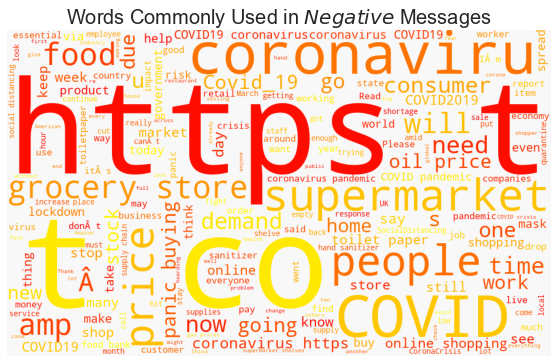

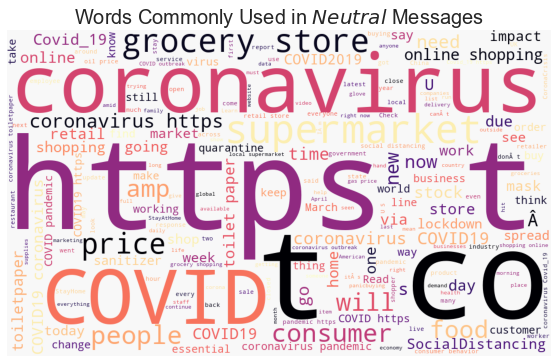

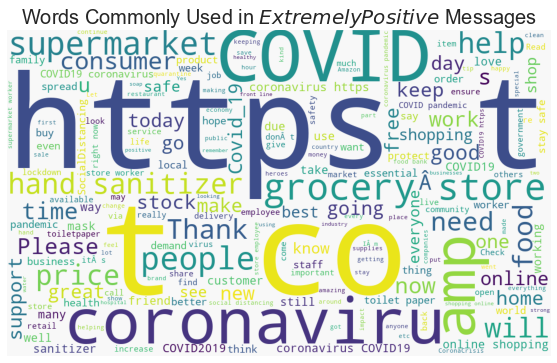

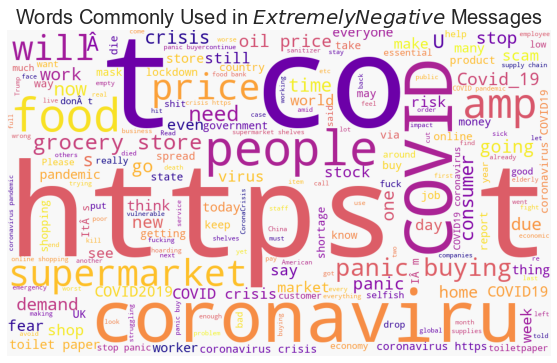

In [17]:
from wordcloud import WordCloud
for label, cmap in zip(['Positive', 'Negative', 'Neutral', 'Extremely Positive', 'Extremely Negative'],
                       ['winter', 'autumn', 'magma', 'viridis', 'plasma']):
    text = df.query('Sentiment == @label')['OriginalTweet'].str.cat(sep=' ')
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${label}$ Messages", size=20)
    plt.show()

# Data processig

# Removing @ ,http// , urls , puntuation , umbers , special characters

In [18]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [19]:
import re
df['Tweet'] = np.vectorize(remove_pattern)(df['OriginalTweet'], '@[\w]*')
df['Tweet'] = df['Tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df['Tweet'] = df['Tweet'].str.replace('[^a-zA-Z#]+',' ')

C:\Users\SOUVIK~1\AppData\Local\Temp/ipykernel_6532/2413359268.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tweet'] = df['Tweet'].str.replace('[^a-zA-Z#]+',' ')


# Removing stop words 

In [20]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Souvik
[nltk_data]     Banerjee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
df['Tweet'].apply(lambda x: [item for item in x if item not in stop])

0                                                      [ ]
1        [v, c, e,  , T, l, k,  ,  , u, r,  , n, e, g, ...
2        [C, r, n, v, r, u,  , A, u, r, l,  , W, l, w, ...
3        [M,  , f,  , c, k,  ,  , n,  , h, e,  , n, l, ...
4        [M, e,  , r, e,  ,  , g,  ,  , u, p, e, r, r, ...
                               ...                        
41152    [A, r, l, n, e,  , p, l,  , f, f, e, r, n, g, ...
41153    [R, e, p, n, e,  ,  , c, p, l, n,  , n,  , p, ...
41154    [Y, u,  , k, n, w,  ,  ,  , g, e, n, g,  , u, ...
41155    [I,  ,  , w, r, n, g,  , h,  , h, e,  , e, l, ...
41156    [ , W, e, l, l,  , n, e, w,  , u, e,  , R, f, ...
Name: Tweet, Length: 41157, dtype: object

In [22]:
df.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elder...
3,3802,48754,U,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,U,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the #COVI...
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,As news of the region s first confirmed COVID ...
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive,Cashier at grocery store was sharing his insig...
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral,Was at the supermarket today Didn t buy toilet...
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive,Due to COVID our retail store and classroom in...
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative,For corona prevention we should stop to buy th...


# Convert in lower case

In [23]:
df["Tweet"] = df["Tweet"].str.lower()

In [24]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...
3,3802,48754,U,16-03-2020,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...
4,3803,48755,U,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the #covi...


# Tokenizing words

In [25]:
tokenized_tweet = df['Tweet'].apply(lambda x: x.split())

# Stemming

In [26]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [27]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [28]:
df['Tweet']  = tokenized_tweet

In [29]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advic talk to your neighbour famili to exchang...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronaviru australia woolworth to give elderli...
3,3802,48754,U,16-03-2020,My food stock is not the only one which is emp...,Positive,my food stock is not the onli one which is emp...
4,3803,48755,U,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me readi to go at supermarket dure the #covid ...


# Convert the 'Extremely Positive' and 'Extremely Negative' Sentiments to 'Positive' and 'Negative' and 'Neutral'


In [30]:
SentimentMapped= {
    'Extremely Negative': 0,
    'Negative': 0,
    'Neutral': 1,
    'Positive': 2,
    'Extremely Positive': 2
}
df['Sentiment']=df['Sentiment'].map(lambda x:SentimentMapped[x])

In [31]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,2,advic talk to your neighbour famili to exchang...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,2,coronaviru australia woolworth to give elderli...
3,3802,48754,U,16-03-2020,My food stock is not the only one which is emp...,2,my food stock is not the onli one which is emp...
4,3803,48755,U,16-03-2020,"Me, ready to go at supermarket during the #COV...",0,me readi to go at supermarket dure the #covid ...


# Split data into training and test data

In [32]:
data = df[['Tweet','Sentiment']]

In [33]:
data.head()

,Tweet,Sentiment
0,,1
1,advic talk to your neighbour famili to exchang...,2
2,coronaviru australia woolworth to give elderli...,2
3,my food stock is not the onli one which is emp...,2
4,me readi to go at supermarket dure the #covid ...,0


In [34]:
data.shape

(41157, 2)

In [35]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data,test_size = 0.2,random_state=0,stratify = data.Sentiment.values)

In [36]:
print("train shape : ", train.shape)
print("test shape : ", test.shape)

train shape :  (32925, 2)
test shape :  (8232, 2)


# Count Vectorizer 

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Tweet.values)
X_test = vectorizer.transform(test.Tweet.values)

y_train = train.Sentiment.values
y_test = test.Sentiment.values

In [38]:
print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (32925, 27328)
X_test.shape :  (8232, 27328)
y_train.shape :  (32925,)
y_test.shape :  (8232,)


# Multinomial Naïve Bayes Classification

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

naiveByes_clf = MultinomialNB()
naiveByes_clf.fit(X_train,y_train)

MultinomialNB()

In [40]:
NB_prediction = naiveByes_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("testing accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_test))

training accuracy Score    :  0.7813211845102506
testing accuracy Score :  0.68488824101069
              precision    recall  f1-score   support

           0       0.76      0.68      0.72      3448
           1       0.26      0.70      0.38       571
           2       0.80      0.69      0.74      4213

    accuracy                           0.68      8232
   macro avg       0.61      0.69      0.61      8232
weighted avg       0.75      0.68      0.71      8232



# SVM Classification 

In [41]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

SVC()

In [42]:
svc_prediction = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Testing accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_test))

Training accuracy Score    :  0.9349430523917995
Testing accuracy Score :  0.7722303206997084
              precision    recall  f1-score   support

           0       0.78      0.79      0.78      3020
           1       0.65      0.66      0.66      1516
           2       0.82      0.80      0.81      3696

    accuracy                           0.77      8232
   macro avg       0.75      0.75      0.75      8232
weighted avg       0.77      0.77      0.77      8232



# KNN Classification

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [53]:
knn_prediction = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test,knn_prediction)
print("Training accuracy Score    : ",knn.score(X_train,y_train))
print("Testing accuracy Score : ",knn_accuracy )
print(classification_report(knn_prediction,y_test))

Training accuracy Score    :  0.5968413059984814
Testing accuracy Score :  0.38654033041788144
              precision    recall  f1-score   support

           0       0.31      0.62      0.41      1531
           1       0.88      0.24      0.38      5530
           2       0.24      0.74      0.36      1171

    accuracy                           0.39      8232
   macro avg       0.48      0.54      0.39      8232
weighted avg       0.68      0.39      0.39      8232



# Confusion Matrices

Text(0.5, 1.0, 'Training and Testing Scores')

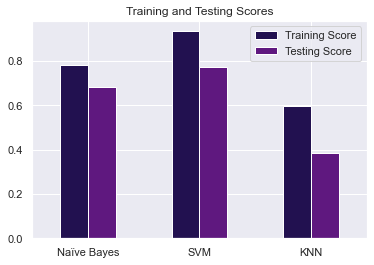

In [54]:
trainScores = [naiveByes_clf.score(X_train,y_train), svc.score(X_train,y_train), knn.score(X_train,y_train)]
testScores = [NB_accuracy, svc_accuracy, knn_accuracy]
indices = ['Naïve Bayes', 'SVM', 'KNN']
scores = pd.DataFrame({'Training Score': trainScores,'Testing Score': testScores}, index=indices)
plot = scores.plot.bar(rot=0)
plt.title('Training and Testing Scores')

In [55]:
NB_prediction = naiveByes_clf.predict(X_test)
svc_prediction = svc.predict(X_test)
knn_prediction = knn.predict(X_test)
predVals = pd.DataFrame(data={'truth': y_test, 'Naïve Bayes': NB_prediction, 'SVM': svc_prediction, 'knn': knn_prediction})

[Text(0.5, 1.0, 'Naïve Bayes')]

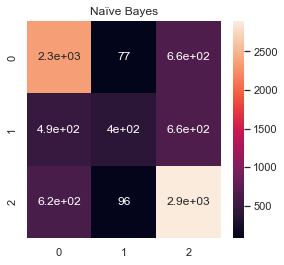

In [47]:
plt.figure(figsize=(20, 4))
plt.subplot(1, 4, 1)
sns.heatmap(sklearn.metrics.confusion_matrix(y_test, NB_prediction), annot=True).set(title='Naïve Bayes')

[Text(0.5, 1.0, 'SVM')]

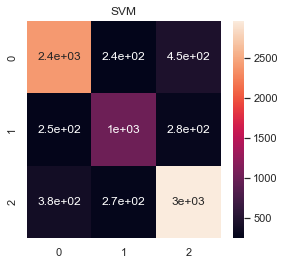

In [48]:
plt.figure(figsize=(20, 4))
plt.subplot(1, 4, 1)
sns.heatmap(sklearn.metrics.confusion_matrix(y_test, svc_prediction), annot=True).set(title='SVM')

[Text(0.5, 1.0, 'KNN')]

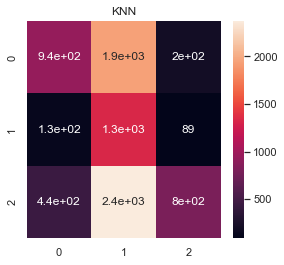

In [49]:
plt.figure(figsize=(20, 4))
plt.subplot(1, 4, 1)
sns.heatmap(sklearn.metrics.confusion_matrix(y_test, knn_prediction), annot=True).set(title='KNN')

# Report the model with the best accuracy

Clearly SVM has the best accuracy.